In [1]:
import os
import matplotlib.pyplot as plt
import json
import torchmetrics
import torch
import numpy as np

In [52]:
dataset = "cub200"
basepath = f"../lightning_logs/{dataset}"

models = ["deterministic", "pfe", "laplace_posthoc_fix", "laplace_posthoc_pos", "laplace_posthoc_full",
                "laplace_online_fix", "laplace_online_pos", "laplace_online_full",
                "laplace_posthoc_arccos_pos", "laplace_posthoc_arccos_full",
                "laplace_online_arccos_pos", "laplace_online_arccos_full"]

all_data = {}
for model in models:

    all_data[model] = {}
    for seed in range(1, 6):
        if "laplace_online" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_online", str(seed), "arccos", model.split("_")[-1])
            else:
                path = os.path.join(basepath, "laplace_online", str(seed), "contrastive", model.split("_")[-1])
        elif "laplace_posthoc" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "arccos", model.split("_")[-1])
            else:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "contrastive", model.split("_")[-1])
        else:
            path = os.path.join(basepath, model, str(seed))

        path = os.path.join(path, "results/figure_data/test__calibration_curve.json")

        if not os.path.isfile(path):
            print(f"missing => {model} with seed {seed}")
            continue

        with open(path, 'r') as f:
            data = json.load(f)

        for key in data:
            if key in all_data[model]: 
                all_data[model][key] += [data[key]]
            else:
                all_data[model][key] = [data[key]]

missing => deterministic with seed 1
missing => deterministic with seed 2
missing => deterministic with seed 3
missing => deterministic with seed 4
missing => deterministic with seed 5
missing => laplace_online_pos with seed 3
missing => laplace_online_pos with seed 4
missing => laplace_online_pos with seed 5
missing => laplace_posthoc_arccos_pos with seed 1
missing => laplace_posthoc_arccos_pos with seed 2
missing => laplace_posthoc_arccos_pos with seed 3
missing => laplace_posthoc_arccos_pos with seed 4
missing => laplace_posthoc_arccos_pos with seed 5
missing => laplace_posthoc_arccos_full with seed 1
missing => laplace_posthoc_arccos_full with seed 2
missing => laplace_posthoc_arccos_full with seed 3
missing => laplace_posthoc_arccos_full with seed 4
missing => laplace_posthoc_arccos_full with seed 5
missing => laplace_online_arccos_pos with seed 1
missing => laplace_online_arccos_pos with seed 2
missing => laplace_online_arccos_pos with seed 3
missing => laplace_online_arccos_pos 

In [53]:
# load package
import seaborn as sns
sns.set_theme(style="whitegrid")

In [54]:
import matplotlib
colorname = []
colorid = []
for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

zippedcolors = list(zip(colorname, colorid))
zippedcolors = sorted(zippedcolors, key=lambda x: x[1])

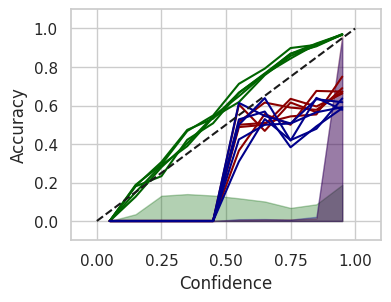

In [55]:
colors = ["darkgreen", "darkred", "darkblue"] #TODO better colors

# colors that will look good in paper
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

fig, ax = plt.subplots(figsize=(4,3))

labels = ["PFE", "LAM (posthoc)", "LAM (online)"]

for mi, model in enumerate(["pfe", "laplace_posthoc_full", "laplace_online_full"]):
    #if model not in ["pfe", "laplace_posthoc_full", "laplace_online_full"]:
    #    continue
    #print(model)
    if "acc" not in all_data[model]:
        continue

    #if "arc" in model:
    #    continue
    
    for i in range(5):
        acc = all_data[model]["acc"][i]
        confidences = all_data[model]["confidences"][i]
        targets = all_data[model]["targets"][i]
        x = np.linspace(0.05, 0.95, 10).tolist()
        if i == 0:

            val, bin = np.histogram(confidences, bins=10, range=(0.0, 1.0), density=False)
            val = val / sum(val)

            ax.fill_between(np.array(x), 0, val, color=colors[mi], alpha=0.3)


for mi, model in enumerate(["pfe", "laplace_posthoc_full", "laplace_online_full"]):
    #if model not in ["pfe", "laplace_posthoc_full", "laplace_online_full"]:
    #    continue
    #print(model)
    if "acc" not in all_data[model]:
        continue

    #if "arc" in model:
    #    continue
    
    for i in range(5):
        acc = all_data[model]["acc"][i]
        confidences = all_data[model]["confidences"][i]
        targets = all_data[model]["targets"][i]

        x = np.linspace(0.05, 0.95, 10).tolist()

        if i == 0:
            ax.plot(x, acc, color=colors[mi], label=labels[mi])
        else:
            ax.plot(x, acc, color=colors[mi])


ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), "k--", label="Best fit")

ax.set(
    xlim=[-0.1, 1.1],
    ylim=[-0.1, 1.1],
    xlabel="Confidence",
    ylabel="Accuracy",
)
#plt.legend()
plt.xlabel("Confidence")
plt.ylabel("Accuracy")
plt.show()


In [23]:
val, bin = np.histogram(confidences, bins=10, range=(0.0, 1.0), density=False)
val = val / sum(val)

In [33]:
np.array(x) + 0.2 * mi

array([0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35])

In [34]:
x

[0.05,
 0.15,
 0.25,
 0.35,
 0.44999999999999996,
 0.5499999999999999,
 0.65,
 0.75,
 0.85,
 0.95]